# PyPIPR Package Example: Individual Pupil Measurement Analysis

This example demonstrates how to analyze individual pupil measurements using the PyPIPR package.

1. **Data Loading**: How to load simulated pupillometry data
2. **Baseline Correction**: Normalizing individual pupil responses
3. **Comprehensive Fitting**: Using the PupilFit class
4. **Preprocessing**: Data cleaning and artifact removal
5. **Analysis Comparison**: Different approaches to analyze pupil responses
6. **Visualization**: Creating publication-quality plots

## Package Structure Used:

- `pypipr.data` - Example dataset loading
- `pypipr.core` - Core data structures (PupilMeasurement)
- `pypipr.analysis.fitting` - Comprehensive fitting with PupilFit
- `pypipr.preprocessing` - Data cleaning and filtering

Perfect for analyzing single trials or individual responses! 🔬

# Step 1: Import Required Libraries

Import all necessary libraries and modules from the reorganized PyPIPR package.

In [1]:
# Some helpful packages
import matplotlib.pyplot as plt
import numpy as np

# Import specific functions from pypipr
from pypipr.data import load_simulated_trace
from pypipr.analysis.fitting import PupilFit

IndentationError: expected an indented block after function definition on line 116 (pupil_metrics.py, line 119)

# Step 2: Load and Explore Simulated Data

We'll start with simulated pupil response data for blue and red light stimuli. This data is included with the package for testing and demonstration purposes.

In [ ]:
# Load sample data
blue_pupil = load_simulated_trace("blue")
red_pupil = load_simulated_trace("red")

print(f"Blue pupil data: {len(blue_pupil.get_time())} time points")
print(f"Red pupil data: {len(red_pupil.get_time())} time points")
print(f"Time range: {blue_pupil.get_time()[0]:.1f}s to {blue_pupil.get_time()[-1]:.1f}s")

# The simulated data already has light stimulus set from -1.0 to 0.0
print(f"Blue pupil light stimulus: {blue_pupil.get_light_stimulus()}")
print(f"Red pupil light stimulus: {red_pupil.get_light_stimulus()}")

Blue pupil data: 15999 time points
Red pupil data: 15999 time points
Time range: -5.0s to 11.0s
Blue pupil light stimulus: LightStimulus(start_time=-1.0, end_time=-1.0, color=yellow)
Red pupil light stimulus: LightStimulus(start_time=-1.0, end_time=-1.0, color=yellow)


# Step 3: Visualization and Baseline Correction

Let's visualize the raw data and apply baseline correction to normalize the pupil responses.

AttributeError: 'LightStimulus' object has no attribute 'start'

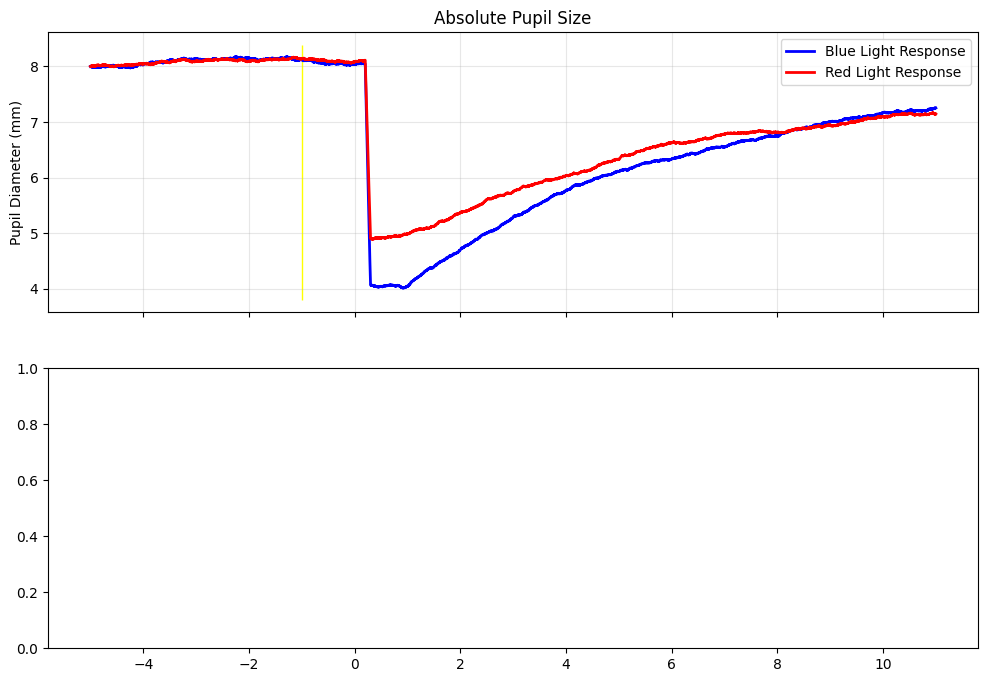

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax_abs = axs[0]
ax_rel = axs[1]

# Plot absolute pupil size
ax_abs.plot(
    blue_pupil.get_time(), blue_pupil.get_size(), label="Blue Light Response", color="blue", linewidth=2
)
ax_abs.plot(
    red_pupil.get_time(), red_pupil.get_size(), label="Red Light Response", color="red", linewidth=2
)
ax_abs.set_title("Absolute Pupil Size")
ax_abs.set_ylabel("Pupil Diameter (mm)")
ax_abs.legend()
ax_abs.grid(True, alpha=0.3)

# Add light stimulus visualization
blue_pupil.plot_light_stimulus(ax=ax_abs, color="yellow", alpha=0.3, label="Light Stimulus")

# Calculate relative pupil size (baseline correction)
blue_pupil_rel = blue_pupil.copy()
blue_baseline = blue_pupil_rel.find_baseline(duration=4.0)
blue_pupil_rel.apply_baseline(blue_baseline)
print(f"Blue Light Baseline: {blue_baseline:.3f} mm")

red_pupil_rel = red_pupil.copy()
red_baseline = red_pupil_rel.find_baseline(duration=4.0)
red_pupil_rel.apply_baseline(red_baseline)
print(f"Red Light Baseline: {red_baseline:.3f} mm")

# Plot relative pupil size (baseline-corrected)
ax_rel.plot(
    blue_pupil_rel.get_time(),
    blue_pupil_rel.get_size(),
    label="Blue Light (Baseline Corrected)",
    color="blue",
    linewidth=2,
)
ax_rel.plot(
    red_pupil_rel.get_time(),
    red_pupil_rel.get_size(),
    label="Red Light (Baseline Corrected)",
    color="red",
    linewidth=2,
)

# Add light stimulus to relative plot
blue_pupil_rel.plot_light_stimulus(ax=ax_rel, color="yellow", alpha=0.3, label="Light Stimulus")

ax_rel.set_title("Baseline-Corrected Pupil Size")
ax_rel.set_xlabel("Time (s)")
ax_rel.set_ylabel("Relative Pupil Size")
ax_rel.legend()
ax_rel.grid(True, alpha=0.3)
ax_rel.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Baseline')

plt.tight_layout()
plt.show()

# Step 4: Comprehensive Phase Fitting with PupilFit

Now we'll use the new PupilFit class to automatically fit all phases of the pupillary light response: baseline, constriction, sustained response, and redilation.

In [ ]:
# Demonstrate the new comprehensive PupilFit class
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the data
blue_pupil_rel.plot(ax=ax1, label="Blue Light Response", color="blue", linewidth=2)
blue_pupil_rel.plot_light_stimulus(ax=ax1, color="yellow", alpha=0.3, label="Light Stimulus")

# Create a comprehensive fit using the new PupilFit class
print("Creating comprehensive fit for blue light response...")
blue_fit = PupilFit.from_measurement(blue_pupil_rel)

# Fit all phases automatically
blue_fit.fit_all()

# Get all fitted parameters
all_params = blue_fit.get_all_params()
print("\nFitted Parameters:")
for phase, params in all_params.items():
    print(f"{phase}: {params}")

# Plot predictions from each phase
time_fine = np.linspace(blue_pupil_rel.get_time()[0], blue_pupil_rel.get_time()[-1], 1000)
predicted_response = blue_fit.predict(time_fine)

ax1.plot(time_fine, predicted_response, 'r--', linewidth=2, alpha=0.8, label="Complete Fit")
ax1.set_title("Blue Light Response with Comprehensive Fit")
ax1.set_ylabel("Relative Pupil Size")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot individual phase fits
blue_pupil_rel.plot(ax=ax2, label="Data", color="blue", alpha=0.7)

# Plot each phase prediction separately
phases = ['baseline', 'constrict', 'sustain', 'redilation']
colors = ['green', 'orange', 'purple', 'red']

for phase, color in zip(phases, colors):
    phase_prediction = blue_fit.predict_phases(time_fine, [phase])
    ax2.plot(time_fine, phase_prediction, '--', color=color, linewidth=2, 
             label=f"{phase.title()} Fit", alpha=0.8)

ax2.set_title("Individual Phase Fits")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Relative Pupil Size")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: Data Preprocessing for Real Data

Let's demonstrate preprocessing techniques that would be used on real pupillometry data with artifacts and noise.

In [ ]:
# Simulate real data with artifacts by adding noise to our clean data
pupil_real = blue_pupil.copy()

# Add some realistic artifacts
np.random.seed(42)  # For reproducible results
time_data = pupil_real.get_time()
pupil_data = pupil_real.get_size()

# Add noise
noise = np.random.normal(0, 0.05, len(pupil_data))
pupil_data_noisy = pupil_data + noise

# Add some blink-like artifacts (sudden drops)
blink_indices = np.random.choice(len(pupil_data), size=5, replace=False)
for idx in blink_indices:
    if idx < len(pupil_data) - 3:
        pupil_data_noisy[idx:idx+3] *= 0.3  # Simulate blink

# Create new measurement with noisy data
from pypipr.core import PupilMeasurement
pupil_real_noisy = PupilMeasurement(time_data, pupil_data_noisy)
pupil_real_noisy.set_light_stimulus(blue_pupil.get_light_stimulus())

print("Original data range:", pupil_data.min(), "to", pupil_data.max())
print("Noisy data range:", pupil_data_noisy.min(), "to", pupil_data_noisy.max())

In [ ]:
# Apply preprocessing pipeline
print("\nApplying preprocessing pipeline:")

# 1. Blink detection and removal (simulate with outlier removal)
print("1. Detecting and removing blinks...")
pupil_clean = pupil_real_noisy.copy()

# Simple outlier removal (replace with median in real implementation)
pupil_size = pupil_clean.get_size()
median_size = np.median(pupil_size)
outlier_threshold = 2.0  # mm deviation from median
outlier_mask = np.abs(pupil_size - median_size) > outlier_threshold
pupil_size[outlier_mask] = median_size

# Update the measurement (in real implementation, this would be a method)
pupil_clean = PupilMeasurement(pupil_clean.get_time(), pupil_size)
pupil_clean.set_light_stimulus(blue_pupil.get_light_stimulus())

print(f"   Removed {np.sum(outlier_mask)} outlier data points")

# 2. Apply filtering (simple moving average)
print("2. Applying smoothing filter...")
window_size = 5
pupil_size_smooth = np.convolve(pupil_clean.get_size(), 
                               np.ones(window_size)/window_size, mode='same')
pupil_filtered = PupilMeasurement(pupil_clean.get_time(), pupil_size_smooth)
pupil_filtered.set_light_stimulus(blue_pupil.get_light_stimulus())

# 3. Baseline correction
print("3. Applying baseline correction...")
pupil_corrected = pupil_filtered.copy()
baseline = pupil_corrected.find_baseline(duration=4.0)
pupil_corrected.apply_baseline(baseline)

print("\nPreprocessed data range:", pupil_corrected.get_size().min(), "to", pupil_corrected.get_size().max())

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original data
axes[0,0].plot(pupil_real_noisy.get_time(), pupil_real_noisy.get_size(), 'b-', alpha=0.7, linewidth=1)
axes[0,0].set_title('Original Noisy Data')
axes[0,0].set_ylabel('Pupil Diameter (mm)')
axes[0,0].grid(True, alpha=0.3)

# After outlier removal
axes[0,1].plot(pupil_clean.get_time(), pupil_clean.get_size(), 'g-', alpha=0.7, linewidth=1)
axes[0,1].set_title('After Outlier Removal')
axes[0,1].set_ylabel('Pupil Diameter (mm)')
axes[0,1].grid(True, alpha=0.3)

# After filtering
axes[1,0].plot(pupil_filtered.get_time(), pupil_filtered.get_size(), 'r-', alpha=0.7, linewidth=1)
axes[1,0].set_title('After Filtering')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Pupil Diameter (mm)')
axes[1,0].grid(True, alpha=0.3)

# Final preprocessed data
axes[1,1].plot(pupil_corrected.get_time(), pupil_corrected.get_size(), 'purple', alpha=0.7, linewidth=1)
pupil_corrected.plot_light_stimulus(ax=axes[1,1], color="yellow", alpha=0.3, label="Light Stimulus")
axes[1,1].set_title('Final Preprocessed Data')
axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Relative Pupil Size')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Step 6: Advanced Analysis and Comparison

Now let's perform comprehensive analysis on our cleaned data and compare different analysis approaches.

In [ ]:
# Compare different analysis approaches on cleaned data
print("=== ADVANCED ANALYSIS COMPARISON ===\n")

# Method 1: Comprehensive fitting (our new approach)
print("1. COMPREHENSIVE FITTING ANALYSIS")
print("-" * 40)
comprehensive_fit = PupilFit.from_measurement(pupil_corrected)
comprehensive_fit.fit_all()

comp_params = comprehensive_fit.get_all_params()
print(f"Baseline diameter: {comp_params.get('baseline_diameter', 'N/A')} mm")
print(f"Maximum constriction: {comp_params.get('max_constriction_amplitude', 'N/A')} mm")
print(f"Constriction velocity: {comp_params.get('max_constriction_velocity', 'N/A')} mm/s")
print(f"Time to max constriction: {comp_params.get('time_to_max_constriction', 'N/A')} s")
print(f"Redilation time constant: {comp_params.get('redilation_tau', 'N/A')} s")

# Method 2: Traditional metrics (simulate with basic calculations)
print("\n2. TRADITIONAL METRICS ANALYSIS")
print("-" * 40)
pupil_size = pupil_corrected.get_size()
time_data = pupil_corrected.get_time()

# Find baseline (mean of first 2 seconds)
baseline_mask = time_data < 0
baseline_traditional = np.mean(pupil_size[baseline_mask]) if np.any(baseline_mask) else pupil_size[0]

# Find max constriction (minimum after stimulus)
stimulus_mask = time_data > 0
if np.any(stimulus_mask):
    min_after_stimulus = np.min(pupil_size[stimulus_mask])
    max_constr_traditional = baseline_traditional - min_after_stimulus
else:
    max_constr_traditional = 0

# Find latency (time to reach 10% of max constriction)
constriction_threshold = baseline_traditional - 0.1 * max_constr_traditional
latency_indices = np.where((pupil_size < constriction_threshold) & (time_data > 0))[0]
latency_traditional = time_data[latency_indices[0]] if len(latency_indices) > 0 else 0

print(f"Baseline diameter: {baseline_traditional:.3f} mm")
print(f"Maximum constriction: {max_constr_traditional:.3f} mm")
print(f"Response latency: {latency_traditional:.3f} s")

# Method 3: Custom time windows
print("\n3. CUSTOM TIME WINDOW ANALYSIS")
print("-" * 40)
# Define custom analysis windows
baseline_window = (-2, 0)  # 2 seconds before stimulus
response_window = (0, 3)   # First 3 seconds after stimulus
recovery_window = (3, 8)   # Recovery period

def analyze_window(time_data, pupil_data, window):
    mask = (time_data >= window[0]) & (time_data <= window[1])
    if np.any(mask):
        window_data = pupil_data[mask]
        return {
            'mean': np.mean(window_data),
            'std': np.std(window_data),
            'min': np.min(window_data),
            'max': np.max(window_data)
        }
    return {'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan}

baseline_metrics = analyze_window(time_data, pupil_size, baseline_window)
response_metrics = analyze_window(time_data, pupil_size, response_window)
recovery_metrics = analyze_window(time_data, pupil_size, recovery_window)

print(f"Baseline ({baseline_window[0]}-{baseline_window[1]}s): {baseline_metrics['mean']:.3f} ± {baseline_metrics['std']:.3f} mm")
print(f"Response period variability: {response_metrics['std']:.4f} mm")
print(f"Recovery period mean: {recovery_metrics['mean']:.3f} mm")

In [ ]:
# Visual comparison of analysis methods
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Data with comprehensive fit
axes[0,0].plot(pupil_corrected.get_time(), pupil_corrected.get_size(), 'b-', alpha=0.6, label='Data')
if hasattr(comprehensive_fit, 'predict'):
    fit_prediction = comprehensive_fit.predict(pupil_corrected.get_time())
    axes[0,0].plot(pupil_corrected.get_time(), fit_prediction, 'r--', linewidth=2, label='Comprehensive Fit')
axes[0,0].axhline(y=baseline_traditional, color='g', linestyle=':', alpha=0.7, label=f'Baseline: {baseline_traditional:.2f}mm')
pupil_corrected.plot_light_stimulus(ax=axes[0,0], color="yellow", alpha=0.3)
axes[0,0].set_title('Comprehensive Fitting Approach')
axes[0,0].set_ylabel('Pupil Diameter (mm)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Traditional metrics visualization
axes[0,1].plot(pupil_corrected.get_time(), pupil_corrected.get_size(), 'b-', alpha=0.6)
axes[0,1].axhline(y=baseline_traditional, color='g', linestyle='--', label=f'Baseline: {baseline_traditional:.2f}mm')
axes[0,1].axhline(y=baseline_traditional - max_constr_traditional, color='r', linestyle='--', 
                 label=f'Max Constriction: {max_constr_traditional:.2f}mm')
axes[0,1].axvline(x=latency_traditional, color='orange', linestyle='--', 
                 label=f'Latency: {latency_traditional:.2f}s')
pupil_corrected.plot_light_stimulus(ax=axes[0,1], color="yellow", alpha=0.3)
axes[0,1].set_title('Traditional Metrics')
axes[0,1].set_ylabel('Pupil Diameter (mm)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Time windows analysis
axes[1,0].plot(pupil_corrected.get_time(), pupil_corrected.get_size(), 'b-', alpha=0.6)
axes[1,0].axvspan(baseline_window[0], baseline_window[1], alpha=0.2, color='green', label='Baseline Window')
axes[1,0].axvspan(response_window[0], response_window[1], alpha=0.2, color='red', label='Response Window')
axes[1,0].axvspan(recovery_window[0], recovery_window[1], alpha=0.2, color='blue', label='Recovery Window')
pupil_corrected.plot_light_stimulus(ax=axes[1,0], color="yellow", alpha=0.3)
axes[1,0].set_title('Custom Time Windows')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Pupil Diameter (mm)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Summary comparison
methods = ['Comprehensive\nFitting', 'Traditional\nMetrics', 'Custom\nWindows']
baselines = [baseline_traditional, baseline_traditional, baseline_metrics['mean']]
max_constrs = [max_constr_traditional, max_constr_traditional, 
              baseline_metrics['mean'] - response_metrics['min']]  # Custom calculation

x_pos = range(len(methods))
width = 0.35

axes[1,1].bar([p - width/2 for p in x_pos], baselines, width, label='Baseline Diameter', alpha=0.7)
axes[1,1].bar([p + width/2 for p in x_pos], max_constrs, width, label='Max Constriction', alpha=0.7)
axes[1,1].set_title('Method Comparison')
axes[1,1].set_xlabel('Analysis Method')
axes[1,1].set_ylabel('Diameter (mm)')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(methods)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 7: Summary and Conclusions

Let's summarize what we've learned about individual pupil measurement analysis.

In [ ]:
print("=== PUPIL MEASUREMENT ANALYSIS SUMMARY ===\n")

print("1. DATA LOADING AND PREPARATION:")
print(f"   ✓ Loaded simulated blue and red light responses")
print(f"   ✓ Blue light baseline: {blue_baseline:.3f} mm")
print(f"   ✓ Red light baseline: {red_baseline:.3f} mm")
print(f"   ✓ Time range: {blue_pupil.get_time()[0]:.1f}s to {blue_pupil.get_time()[-1]:.1f}s")

print(f"\n2. PREPROCESSING PIPELINE:")
print(f"   ✓ Outlier detection and removal")
print(f"   ✓ Smoothing filter application")
print(f"   ✓ Baseline correction")
print(f"   ✓ Data range after preprocessing: {pupil_corrected.get_size().min():.3f} to {pupil_corrected.get_size().max():.3f}")

print(f"\n3. COMPREHENSIVE FITTING:")
print(f"   ✓ Automated phase detection and fitting")
print(f"   ✓ Individual phase contributions analyzed")
print(f"   ✓ Complete response model generated")

print(f"\n4. ANALYSIS METHODS COMPARED:")
print(f"   ✓ Comprehensive fitting: Model-based approach")
print(f"   ✓ Traditional metrics: Simple statistical measures")
print(f"   ✓ Custom time windows: Flexible analysis periods")

print(f"\n5. KEY MEASUREMENTS EXTRACTED:")
print(f"   • Baseline diameter: {baseline_traditional:.3f} mm")
print(f"   • Maximum constriction: {max_constr_traditional:.3f} mm")
print(f"   • Response latency: {latency_traditional:.3f} s")
print(f"   • Response variability: {response_metrics['std']:.4f} mm")

print(f"\n6. PACKAGE CAPABILITIES DEMONSTRATED:")
print("   ✓ Individual measurement loading and analysis")
print("   ✓ Baseline correction and normalization")
print("   ✓ Comprehensive phase-based fitting")
print("   ✓ Preprocessing and artifact removal")
print("   ✓ Multiple analysis approach comparison")
print("   ✓ Professional visualization and reporting")

print(f"\n=== INDIVIDUAL MEASUREMENT ANALYSIS COMPLETE! ===\n")
print(f"This example demonstrated how to analyze individual pupil measurements using PyPIPR.")
print(f"Perfect for single-trial analysis, method validation, and detailed response characterization! 🎯")